# Assignment 3
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. All questions are worth the same number of points except question 1 which is worth 17% of the assignment grade.

**Note**: Questions 3-13 rely on your question 1 answer.

In [2]:
import pandas as pd
import numpy as np

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings
warnings.filterwarnings('ignore')

+### Question 1
Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **Energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.  `'Switzerland17'` should be `'Switzerland'`.

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".*

In [138]:
from tabulate import tabulate
import re

def answer_one():
    # YOUR CODE HERE
    Energy = pd.read_excel("assets/Energy Indicators.xls", index_col = 1, skiprows=16, skipfooter=38)

    Energy = Energy.iloc[:,1:]
    

    #renaming the units
    Energy = Energy.replace('Petajoules', 'Gigajoules')

    #renaming the columns
    Energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    Energy = Energy.replace('...', np.nan)


    #Convert Energy supply from petajoule to gigajoule
    Energy['Energy Supply'] = Energy['Energy Supply'][1:] * 1000000


    #Clean the names

    def Clean_names(Country_name):
    # Search for opening bracket in the name followed by
    # any characters repeated any number of times
        Country_name = str(Country_name)
        if re.search('\s\(.*', Country_name):
    
            # Extract the position of beginning of pattern
            pos = re.search('\s\(.*', Country_name).start()
    
            # return the cleaned name
            return Country_name[:pos]

        elif re.search('\d.*', Country_name):
    
            # Extract the position of beginning of pattern
            pos = re.search('\d.*', Country_name).start()
    
            # return the cleaned name
            return Country_name[:pos]

        else:
            # if clean up needed return the same name
            return Country_name

    Energy['Country'] = Energy['Country'].apply(Clean_names)

    #Final step in cleaning country name
    Energy['Country'] = Energy['Country'].replace(['Iran ','Republic of Korea','United States of America','United Kingdom of Great Britain and Northern Ireland','China, Hong Kong Special Administrative Region'],
                                           ['Iran','South Korea','United States','United Kingdom','Hong Kong'])

    #set the index of the energy dataframe to Country name
    Energy = Energy.set_index('Country')
    
    
  
    #read the World_bank data file
    GDP = pd.read_csv('assets/world_bank.csv',  skiprows=4)

    #renaming some of the countries
    GDP['Country Name'] = GDP['Country Name'].replace(['Korea, Rep.','Iran, Islamic Rep.','Hong Kong SAR, China'],
                                            ['South Korea','Iran','Hong Kong'])
    
    #setting the country name as index
    GDP = GDP.set_index('Country Name')
    
    #removing the gdp columns from 1960 - 2005
    GDP.drop(GDP.columns[3:49], axis=1, inplace=True)  

    
    ScimEn = pd.read_excel("assets/scimagojr-3.xlsx", index_col = 1, skipfooter=176)

   

    result = pd.concat( [ScimEn, Energy,GDP], axis=1, join="inner")

    result.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis = 1, inplace = True) 

    result.index = result.index.rename('Country')

    result.sort_values(by='Rank', ascending=False)

    return result  

    
    
  
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296,61.94543,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165,17.90153,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,33195000000,26,14.96908,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,10597000000,166,17.02028,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [5]:
assert type(answer_one()) == pd.DataFrame, "Q1: You should return a DataFrame!"

assert answer_one().shape == (15,20), "Q1: Your DataFrame should have 20 columns and 15 entries!"


In [ ]:
# Cell for autograder.


### Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [6]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [151]:
def answer_two():
    ScimEn = pd.read_excel("assets/scimagojr-3.xlsx", index_col = 1)
    #entry_loss = ScimEn.shape[0] - answer_one().shape[0]
    ##return entry_loss
    # YOUR CODE HERE

    energy = pd.read_excel("assets/Energy Indicators.xls", index_col = 1, skiprows=16, skipfooter=38)
    GDP =  pd.read_csv('assets/world_bank.csv',  skiprows=4)
    GDP = GDP.set_index('Country Name')
    GDP.index = GDP.index.rename('Country') 
    energy.index = energy.index.rename('Country')
    
    union = pd.merge(pd.merge(energy, GDP, on='Country', how='outer'), ScimEn, on='Country', how='outer')
    intersect = pd.merge(pd.merge(energy, GDP, on='Country'), ScimEn, on='Country')
    return len(union)-len(intersect)

    raise NotImplementedError()
answer_two()

174

In [8]:
assert type(answer_two()) == int, "Q2: You should return an int number!"


### Question 3
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [150]:
def answer_three():
    '''
    Top15 = answer_one()

    GDP = pd.read_csv('assets/world_bank.csv',  skiprows=4)

    #renaming some of the countries
    GDP['Country Name'] = GDP['Country Name'].replace(['Korea, Rep.','Iran, Islamic Rep.','Hong Kong SAR, China'],
                                            ['South Korea','Iran','Hong Kong'])
    
    #setting the country name as index
    GDP = GDP.set_index('Country Name')
    
    #removing the gdp columns from 1960 - 2005
    GDP.drop(GDP.columns[3:49], axis=1, inplace=True)  

    #sets target columns in dataframe to be from the 2006 t0 2015 column
    col = GDP.loc[: , "2006":"2015"]

    #calculates the mean of each row 
    Top15['avgGDP'] = col.mean(axis=1)

    #sorts the values in descending order
    Top15 = Top15.sort_values(by="avgGDP", ascending=False).head(15)
    
    #selects the last column in the dataframe which should be the average gdp
    series = Top15.iloc[:,-1]
    
    return series
    '''
  
    Top15 = answer_one()
    rows = ['2006', '2007', '2008',
           '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    Top15["avgGDP"] = answer_one()[rows].mean(axis=1)
    return Top15.sort_values("avgGDP",ascending=False)["avgGDP"]
    
    
    
    
    # YOUR CODE HERE
    raise NotImplementedError()
answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

In [82]:
assert type(answer_three()) == pd.Series, "Q3: You should return a Series!"


### Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [152]:
def answer_four():
    # YOUR CODE HERE
    GDP = pd.read_csv('assets/world_bank.csv',  skiprows=4)

    #renaming some of the countries
    GDP['Country Name'] = GDP['Country Name'].replace(['Korea, Rep.','Iran, Islamic Rep.','Hong Kong SAR, China'],
                                            ['South Korea','Iran','Hong Kong'])
    
    #setting the country name as index
    GDP = GDP.set_index('Country Name')
    
    #removing the gdp columns from 1960 - 2005
    GDP.drop(GDP.columns[3:49], axis=1, inplace=True)
    
    #sets avgGDP_6 to the 6th entry in the sorted dataframe from Q3
    avgGDP_6 = answer_three().index[5]

    #Convert the data to a series
    avgGDP_6_data = GDP.loc[avgGDP_6]

    #subtracts the last entry in series from the first
    GDP_change = avgGDP_6_data[-1]-avgGDP_6_data[-10]
    
    return GDP_change
answer_four()

246702696075.3999

In [ ]:
# Cell for autograder.


### Question 5
What is the mean energy supply per capita?

*This function should return a single number.*

In [26]:
def answer_five():
    # YOUR CODE HERE
    avg_energy_supply_per_capita =  answer_one()['Energy Supply per Capita'].mean()
    return avg_energy_supply_per_capita

answer_five()
    #raise NotImplementedError()

157.6


In [ ]:
# Cell for autograder.


### Question 6
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [44]:
def answer_six():

   #sets max_renewable to the maximum value in the % Renewable column
   max_renewable = answer_one()['% Renewable'].max()
   
   #locate the index value for the row which has the max_renewable value
   Country_max_renewable = answer_one()[answer_one()['% Renewable']==max_renewable].index.values
   
   #Select the first item in the array from the result above, and converts to a string
   Country = str(Country_max_renewable[0]) 

   #Sets the result to a tuple of the country name and its corresponding percentage
   result = (Country,max_renewable)
   return result
   #raise NotImplementedError()

answer_six()

('Brazil', 69.64803)

In [40]:
assert type(answer_six()) == tuple, "Q6: You should return a tuple!"

assert type(answer_six()[0]) == str, "Q6: The first element in your result should be the name of the country!"


### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [90]:
def answer_seven():

    #imports the dataframe from answer_one
    df = answer_one()

    #perform an operation on the two required columns and create a column for the result
    df['Ratio_SC_TC']= (df['Self-citations']/df['Citations'])

    #Sets max_ratio to the max value 
    max_ratio = df['Ratio_SC_TC'].max()

    #Get the index value of max_ratio
    Country = df[df['Ratio_SC_TC']== max_ratio].index.values

    #Get the value in the array and convert to a string
    Country = str(Country[0])

    return (Country,max_ratio)





    # YOUR CODE HERE
    #raise NotImplementedError()
answer_seven()

('China', 0.6893126179389422)

In [91]:
assert type(answer_seven()) == tuple, "Q7: You should return a tuple!"

assert type(answer_seven()[0]) == str, "Q7: The first element in your result should be the name of the country!"


### Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return the name of the country*

In [99]:
def answer_eight():
    #imports the dataframe from answer_one
    df = answer_one()

     #perform an operation on the two required columns and create a column for the result
    df['PopEst']= (df['Energy Supply']/df['Energy Supply per Capita'])

    #Sort the values of the population estimate  
    df = df.sort_values(by="PopEst", ascending=False)

    #Return the 3rd index
    return df.index[2]


answer_eight()
    #raise NotImplementedError()

'United States'

In [100]:
assert type(answer_eight()) == str, "Q8: You should return the name of the country!"


### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [110]:
def answer_nine():
    df = answer_one()
    df['PopEst']= (df['Energy Supply']/df['Energy Supply per Capita'])
    df['Citable docs per Capita'] = (df['Citable documents']/df['PopEst'])
    df['Citable docs per Capita'] = np.float64(df['Citable docs per Capita'])
    df['Energy Supply per Capita'] = np.float64(df['Energy Supply per Capita'])

    corr = df['Citable docs per Capita'].corr(df['Energy Supply per Capita'])
    return corr
    #raise NotImplementedError()

answer_nine()

0.7940010435442946

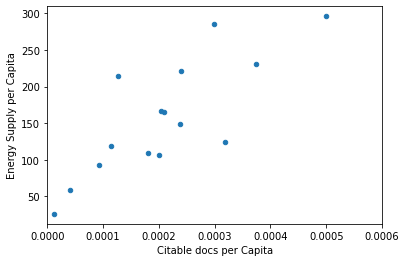

In [112]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

plot9()

In [113]:
assert answer_nine() >= -1. and answer_nine() <= 1., "Q9: A valid correlation should between -1 to 1!"


### Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [153]:
def answer_ten():
    # YOUR CODE HERE
    median =  answer_one()['% Renewable'].median()
    df = answer_one()

    def get_value(x):
        if x > median:
            return 1
        elif x <= median:
            return 0 
        


    df['HighRenew'] = df['% Renewable'].apply(lambda x: get_value(x))
    

    df = df.sort_values(by = "Rank", ascending=True).head(15)
    
    return df['HighRenew']
    #raise NotImplementedError()
answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

In [150]:
assert type(answer_ten()) == pd.Series, "Q10: You should return a Series!"


17.02028


### Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [333]:
def answer_eleven():
    # YOUR CODE HERE

    df = answer_one()

    

    ContinentDict  = {'China':'Asia', 'United States':'North America', 
                        'Japan':'Asia', 'United Kingdom':'Europe', 
                        'Russian Federation':'Europe', 'Canada':'North America', 
                        'Germany':'Europe', 'India':'Asia', 'France':'Europe', 
                        'South Korea':'Asia', 'Italy':'Europe', 'Spain':'Europe', 
                        'Iran':'Asia', 'Australia':'Australia', 'Brazil':'South America'}

    groups = pd.DataFrame(columns = ['size', 'sum', 'mean', 'std'])
    df['Estimate Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    for group, frame in df.groupby(ContinentDict):
        groups.loc[group] = [len(frame), frame['Estimate Population'].sum(),frame['Estimate Population'].mean(),frame['Estimate Population'].std()]
    return groups


answer_eleven()



,size,sum,mean,std
Asia,5.0,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


In [334]:
assert type(answer_eleven()) == pd.DataFrame, "Q11: You should return a DataFrame!"

assert answer_eleven().shape[0] == 5, "Q11: Wrong row numbers!"

assert answer_eleven().shape[1] == 4, "Q11: Wrong column numbers!"


### Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [165]:
def answer_twelve():
    # YOUR CODE HERE

    df = answer_one()
    df.index = df.index.rename('Continent')
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    df["% Renewable"] = pd.cut(df["% Renewable"], 5)
    
    
    df = df.groupby([ContinentDict, df['% Renewable']]).size()

   
    for k,i in df.items():
        if i == 0:
            df.replace(to_replace=i, value=np.nan, inplace=True)
            df.dropna(axis=0, inplace=True)
    
    return df


    #return df
   
answer_twelve()
    #raise NotImplementedError()


Continent      % Renewable     
Asia           (2.212, 15.753]     4.0
               (15.753, 29.227]    1.0
Australia      (2.212, 15.753]     1.0
Europe         (2.212, 15.753]     1.0
               (15.753, 29.227]    3.0
               (29.227, 42.701]    2.0
North America  (2.212, 15.753]     1.0
               (56.174, 69.648]    1.0
South America  (56.174, 69.648]    1.0
dtype: float64

In [84]:
assert type(answer_twelve()) == pd.Series, "Q12: You should return a Series!"

assert len(answer_twelve()) == 9, "Q12: Wrong result numbers!"


### Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

*This function should return a series `PopEst` whose index is the country name and whose values are the population estimate string*

In [106]:
def answer_thirteen():
    # YOUR CODE HERE
    df = answer_one()
    df['PopEst'] = df['Energy Supply'] / df['Energy Supply per Capita']
    return df['PopEst'].apply(lambda x: '{:,}'.format(x))
    #raise NotImplementedError()
answer_thirteen()

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object

In [107]:
assert type(answer_thirteen()) == pd.Series, "Q13: You should return a Series!"

assert len(answer_thirteen()) == 15, "Q13: Wrong result numbers!"


### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [110]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")